In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [0]:
X = mnist['data']
y = mnist['target']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_trian, y_test = train_test_split(X, y, test_size=0.333)

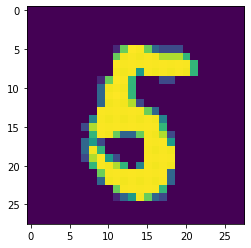

In [81]:
plt.imshow(x_train[13].reshape(28,28))

#Binary classifier

In [0]:
y_binary = y.copy()
y_binary[y_binary!='5'] = 0
y_binary[y_binary=='5'] = 1
y_binary = np.array(y_binary, dtype=int)

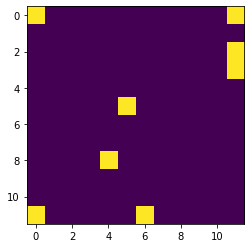

In [83]:
plt.imshow(y_binary[:144].reshape((12,12)))

In [0]:
x_train, x_test, y_train_b, y_test_b = train_test_split(X, y_binary, test_size = 0.3)

## Training the Model (SGD)

In [0]:
from sklearn.linear_model import SGDClassifier

In [86]:
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_b)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
pred = sgd_clf.predict(x_test)

## Now lets compute the Confusion Matrix


In [0]:
from sklearn.metrics import confusion_matrix as cfm

In [89]:
cfm (y_test_b, pred )

array([[18908,   165],
       [  572,  1355]])

## Calculating the Scores


In [0]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

In [91]:
f1_score(y_test_b, pred)

0.786190890629533

In [92]:
accuracy_score(y_test_b, pred)

0.9649047619047619

In [93]:
recall_score(y_test_b, pred)

0.7031655422937209

In [94]:
precision_score(y_test_b, pred)

0.8914473684210527

## Cross Validation

Calculating the Scores using Cross validation

In [95]:
from sklearn.model_selection import cross_validate
from sklearn import metrics
metrics.SCORERS.keys()
#'decision_function' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [96]:
cross_validate(sgd_clf, x_test, y_test_b, cv=3, scoring='accuracy')

{'fit_time': array([1.49672794, 2.07732296, 2.26907992]),
 'score_time': array([0.01046276, 0.0093646 , 0.00871181]),
 'test_score': array([0.959     , 0.95942857, 0.95871429])}

In [0]:
from sklearn.model_selection import cross_val_score

In [98]:
cross_val_score(sgd_clf,x_test, y_test_b, cv=3,scoring='accuracy')

array([0.88757143, 0.94842857, 0.96557143])

In [99]:
cross_val_score(sgd_clf, x_test, y_test_b, cv=3, scoring='f1')

array([0.63655031, 0.74698795, 0.78601997])

In [100]:
cross_val_score(sgd_clf, x_test, y_test_b, cv=3, scoring='precision')

array([0.93292683, 0.79559748, 0.86680328])

In [101]:
cross_val_score(sgd_clf, x_test, y_test_b, cv=3, scoring='recall')

array([0.86915888, 0.81775701, 0.86314152])

## Decision function and playing with Thresholds


This can be used to plot the ROC plot

In [102]:
sgd_clf.decision_function(x_test)

#the threshold of the SGD is 0

array([ -7819.00109498, -18482.89096612,  -7790.32943735, ...,
       -12015.21567046, -26094.74866818,  -6608.57341931])

In [0]:
from sklearn.model_selection import cross_val_predict

In [105]:
cross_val_predict(sgd_clf, x_test, y_test_b, cv=3, method='decision_function')

array([ -69299.15028347, -133020.59822676,  -44647.27586723, ...,
       -169170.46166471, -234366.8078222 ,  -46897.82185203])

In [0]:
# Note that some classifiers don't have the 'decision_function' as the method of cross_val_predict
# randomforestclassifer is an example. for those you can use 'predict_proba' wich will return the probability 
# that an instance belong to an specific class

## The Precision-Recall Curve

You can actually swip the threshold and calculate the Precision and Recall for every possible threshold.

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

In [0]:
y_pred_b = cross_val_predict(sgd_clf, x_test, y_test_b, cv=3, method='decision_function')

In [0]:
precision,  recall, threshold = precision_recall_curve(y_test_b, y_pred_b)

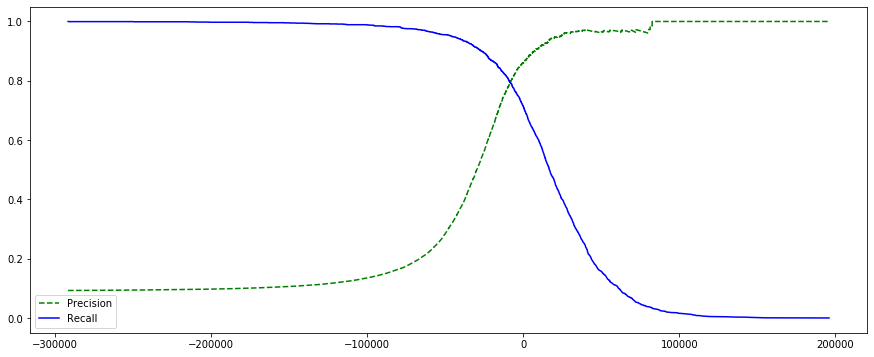

In [117]:
plt.figure(figsize=(15,6)),
plt.plot(threshold, precision[:-1], 'g--', label='Precision')
plt.plot(threshold, recall[:-1], 'b-', label='Recall')
plt.legend()

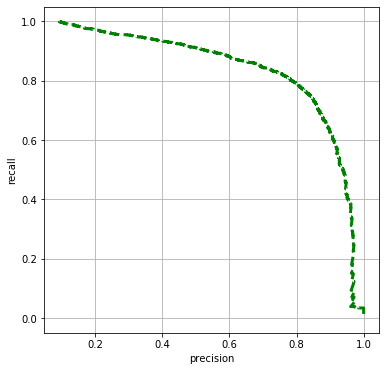

In [124]:
plt.figure(figsize=(6,6))
plt.plot(precision, recall, 'g--', lw=3)
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid(True)

## The ROC plot

In [0]:
from sklearn.metrics import roc_curve

In [0]:
fpr, tpr, threshold = roc_curve(y_test_b, y_pred_b)

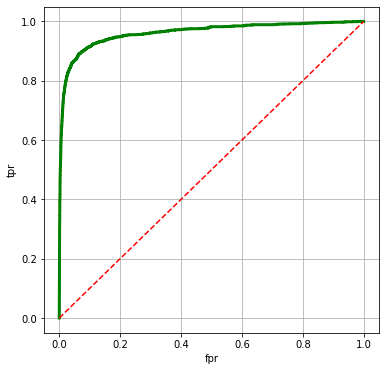

In [128]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, 'g-', lw=3)
plt.plot([0, 1],[0,1],'r--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid(True)

## Train another model

In [129]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train_b)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred_y_b = cross_val_predict(rfc, x_test, y_test_b, cv=3, method='predict_proba')

In [0]:
fpr, tpr, threshold = roc_curve(y_test_b, pred_y_b[:,1])

In [137]:
pred_y_b

array([[1.  , 0.  ],
       [0.94, 0.06],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [0.99, 0.01],
       [0.97, 0.03]])

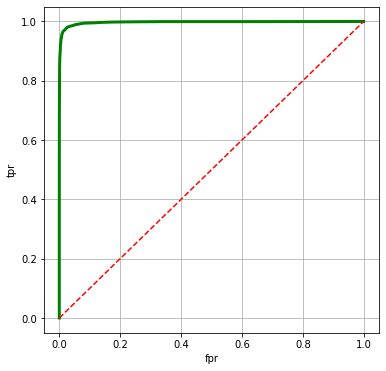

In [138]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, 'g-', lw=3)
plt.plot([0, 1],[0,1],'r--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid(True)

# Multiclass classification

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [0]:
from sklearn.linear_model import SGDClassifier

In [148]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [149]:
sgd.predict(x_test)

array(['8', '0', '9', ..., '9', '3', '4'], dtype='<U1')

In [151]:
sgd.decision_function(x_test)

array([[-15355.65588835, -23174.82323286,  -5667.57047812, ...,
        -29958.04084288,   4153.79858516,  -1436.20046358],
       [  7695.30615199, -56500.9489347 , -12336.76956875, ...,
        -68990.24415548,  -4716.66005954,  -6549.17051454],
       [-68740.91167366, -27961.69710328, -16228.75271468, ...,
        -34436.19284878,  -1809.77696169,   -741.27646908],
       ...,
       [-51465.42099731, -53935.75706183, -12473.85411593, ...,
        -14426.20083973,  -3896.30710333,   1714.16207669],
       [-47060.396745  , -51788.52110962,   1791.97833966, ...,
        -84759.86999338,  -4063.65185595, -18884.75837612],
       [-29464.78527249, -75336.34015243, -15774.95243179, ...,
        -58217.31029646,  -9558.87392328, -12868.04405623]])

In [0]:
# Note that the classifiers decide automaticly with which strategy do the multiclass classification job
# to select manually which method to use, you can do as the following:

In [0]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

In [0]:
from sklearn.svm import SVC

In [156]:
my_classifier_OVO = OneVsOneClassifier(SVC())
my_classifier_OVO.fit(x_train, y_train)

OneVsOneClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   n_jobs=None)

In [0]:
my_classifier_OVO.predict(x_test)

In [0]:
my_classifier_OVO.decision_function(x_test)

In [0]:
from sklearn.model_selection import coss_val_predict

In [0]:
cross_val_predict(my_classifier_OVO, x_test, y_test, cv=3, method='decision_function')